# **Load Packages**



In [ ]:
# Ignore the warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
from numpy import expand_dims
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.datasets import load_digits

from keras.layers import Dense,Activation
from keras.models import Sequential
from keras.optimizers import Adam, SGD

# **Load Dataset**

In [ ]:
# Mount the drive
credit_data = pd.read_csv("/content/drive/MyDrive/Industry_Session_19_June_2021/credit_data.csv")
credit_data.head()

,Status_of_existing_checking_account,Duration_in_month,Credit_history,Purpose,Credit_amount,Savings_Account,Present_Employment_since,Installment_rate_in_percentage_of_disposable_income,Personal_status_and_sex,Other_debtors,Present_residence_since,Property,Age_in_years,Other_installment_plans,Housing,Number_of_existing_credits_at_this_bank,Job,Number_of_People_being_liable_to_provide_maintenance_for,Telephone,Foreign_worker,class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2


In [ ]:
credit_data['class'] = credit_data['class']-1
credit_data.shape

(1007, 21)

In [ ]:
# Dataset class distribution
credit_data['class'].value_counts()/len(credit_data)

0    0.707051
1    0.292949
Name: class, dtype: float64

In [ ]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Status_of_existing_checking_account                       1007 non-null   object
 1   Duration_in_month                                         1007 non-null   int64 
 2   Credit_history                                            1007 non-null   object
 3   Purpose                                                   1007 non-null   object
 4   Credit_amount                                             1007 non-null   int64 
 5   Savings_Account                                           1007 non-null   object
 6   Present_Employment_since                                  1007 non-null   object
 7   Installment_rate_in_percentage_of_disposable_income       1007 non-null   int64 
 8   Personal_status_and_sex     

# **1. Data Preprocessing - EDA**

In [ ]:
credit_data.isnull().sum()

Status_of_existing_checking_account                         0
Duration_in_month                                           0
Credit_history                                              0
Purpose                                                     0
Credit_amount                                               0
Savings_Account                                             0
Present_Employment_since                                    0
Installment_rate_in_percentage_of_disposable_income         0
Personal_status_and_sex                                     0
Other_debtors                                               0
Present_residence_since                                     0
Property                                                    0
Age_in_years                                                0
Other_installment_plans                                     0
Housing                                                     0
Number_of_existing_credits_at_this_bank                     0
Job     

No missing values present

In [ ]:
credit_data.head()

,Status_of_existing_checking_account,Duration_in_month,Credit_history,Purpose,Credit_amount,Savings_Account,Present_Employment_since,Installment_rate_in_percentage_of_disposable_income,Personal_status_and_sex,Other_debtors,Present_residence_since,Property,Age_in_years,Other_installment_plans,Housing,Number_of_existing_credits_at_this_bank,Job,Number_of_People_being_liable_to_provide_maintenance_for,Telephone,Foreign_worker,class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,0
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,1
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,0
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,0
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,1


In [ ]:
y = credit_data['class']
y.shape

(1007,)

## **Encoding Categorical Data**

In [ ]:
cat_cols = credit_data.select_dtypes(include="object").columns.tolist()
print(cat_cols)

['Status_of_existing_checking_account', 'Credit_history', 'Purpose', 'Savings_Account', 'Present_Employment_since', 'Personal_status_and_sex', 'Other_debtors', 'Property', 'Other_installment_plans', 'Housing', 'Job', 'Telephone', 'Foreign_worker']


In [ ]:
cat_data = credit_data[cat_cols]
cat_data.head()

,Status_of_existing_checking_account,Credit_history,Purpose,Savings_Account,Present_Employment_since,Personal_status_and_sex,Other_debtors,Property,Other_installment_plans,Housing,Job,Telephone,Foreign_worker
0,A11,A34,A43,A65,A75,A93,A101,A121,A143,A152,A173,A192,A201
1,A12,A32,A43,A61,A73,A92,A101,A121,A143,A152,A173,A191,A201
2,A14,A34,A46,A61,A74,A93,A101,A121,A143,A152,A172,A191,A201
3,A11,A32,A42,A61,A74,A93,A103,A122,A143,A153,A173,A191,A201
4,A11,A33,A40,A61,A73,A93,A101,A124,A143,A153,A173,A191,A201


In [ ]:
#convert categorical variable into dummy
cat_df = pd.get_dummies(cat_data)
print(cat_data.shape)
print(cat_df.shape)

(1007, 13)
(1007, 54)


In [ ]:
credit_data_encoded = pd.concat([cat_df, credit_data.drop(cat_cols,axis=1)],axis=1)
credit_data_encoded.shape

(1007, 62)

In [ ]:
credit_data_encoded.head()

,Status_of_existing_checking_account_A11,Status_of_existing_checking_account_A12,Status_of_existing_checking_account_A13,Status_of_existing_checking_account_A14,Credit_history_A30,Credit_history_A31,Credit_history_A32,Credit_history_A33,Credit_history_A34,Purpose_A40,Purpose_A41,Purpose_A410,Purpose_A42,Purpose_A43,Purpose_A44,Purpose_A45,Purpose_A46,Purpose_A48,Purpose_A49,Savings_Account_A61,Savings_Account_A62,Savings_Account_A63,Savings_Account_A64,Savings_Account_A65,Present_Employment_since_A71,Present_Employment_since_A72,Present_Employment_since_A73,Present_Employment_since_A74,Present_Employment_since_A75,Personal_status_and_sex_A91,Personal_status_and_sex_A92,Personal_status_and_sex_A93,Personal_status_and_sex_A94,Other_debtors_A101,Other_debtors_A102,Other_debtors_A103,Property_A121,Property_A122,Property_A123,Property_A124,Other_installment_plans_A141,Other_installment_plans_A142,Other_installment_plans_A143,Housing_A151,Housing_A152,Housing_A153,Job_A171,Job_A172,Job_A173,Job_A174,Telephone_A191,Telephone_A192,Foreign_worker_A201,Foreign_worker_A202,Duration_in_month,Credit_amount,Installment_rate_in_percentage_of_disposable_income,Present_residence_since,Age_in_years,Number_of_existing_credits_at_this_bank,Number_of_People_being_liable_to_provide_maintenance_for,class
0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,6,1169,4,4,67,2,1,0
1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,48,5951,2,2,22,1,1,1
2,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,12,2096,2,3,49,1,2,0
3,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,42,7882,2,4,45,1,2,0
4,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,24,4870,3,4,53,2,2,1


## **Train Test Split**

In [ ]:
# Need to scale the continuous variables and combine for later processing
df_x_train, df_x_test, df_y_train,df_y_test = train_test_split(credit_data_encoded.drop('class',axis=1),
                                                                y, 
                                                                train_size=0.7,
                                                                random_state=42)

print("Df x train shape", df_x_train.shape)
print("Df x test shape", df_x_test.shape)
print("Df y train shape", df_y_train.shape)
print("Df y test shape", df_y_test.shape)

Df x train shape (704, 61)
Df x test shape (303, 61)
Df y train shape (704,)
Df y test shape (303,)


In [ ]:
print(pd.Series(df_y_train).value_counts(normalize=True))
print(pd.Series(df_y_test).value_counts(normalize=True))

0    0.711648
1    0.288352
Name: class, dtype: float64
0    0.69637
1    0.30363
Name: class, dtype: float64


In [ ]:
df_x_train, df_x_test, df_y_train,df_y_test = train_test_split(credit_data_encoded.drop('class',axis=1),
                                                                y, stratify = y,
                                                                train_size=0.7,
                                                                random_state=42)

In [ ]:
print(pd.Series(df_y_train).value_counts(normalize=True))
print(pd.Series(df_y_test).value_counts(normalize=True))

0    0.707386
1    0.292614
Name: class, dtype: float64
0    0.706271
1    0.293729
Name: class, dtype: float64


In [ ]:
df_x_train.head()

,Status_of_existing_checking_account_A11,Status_of_existing_checking_account_A12,Status_of_existing_checking_account_A13,Status_of_existing_checking_account_A14,Credit_history_A30,Credit_history_A31,Credit_history_A32,Credit_history_A33,Credit_history_A34,Purpose_A40,Purpose_A41,Purpose_A410,Purpose_A42,Purpose_A43,Purpose_A44,Purpose_A45,Purpose_A46,Purpose_A48,Purpose_A49,Savings_Account_A61,Savings_Account_A62,Savings_Account_A63,Savings_Account_A64,Savings_Account_A65,Present_Employment_since_A71,Present_Employment_since_A72,Present_Employment_since_A73,Present_Employment_since_A74,Present_Employment_since_A75,Personal_status_and_sex_A91,Personal_status_and_sex_A92,Personal_status_and_sex_A93,Personal_status_and_sex_A94,Other_debtors_A101,Other_debtors_A102,Other_debtors_A103,Property_A121,Property_A122,Property_A123,Property_A124,Other_installment_plans_A141,Other_installment_plans_A142,Other_installment_plans_A143,Housing_A151,Housing_A152,Housing_A153,Job_A171,Job_A172,Job_A173,Job_A174,Telephone_A191,Telephone_A192,Foreign_worker_A201,Foreign_worker_A202,Duration_in_month,Credit_amount,Installment_rate_in_percentage_of_disposable_income,Present_residence_since,Age_in_years,Number_of_existing_credits_at_this_bank,Number_of_People_being_liable_to_provide_maintenance_for
201,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,12,1168,4,3,27,1,1
442,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,20,2629,2,3,29,2,1
916,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,1,0,9,5129,2,4,74,1,2
848,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,33,4281,1,4,23,2,1
618,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,30,3441,2,4,21,1,1


In [ ]:
df_x_test.head()

,Status_of_existing_checking_account_A11,Status_of_existing_checking_account_A12,Status_of_existing_checking_account_A13,Status_of_existing_checking_account_A14,Credit_history_A30,Credit_history_A31,Credit_history_A32,Credit_history_A33,Credit_history_A34,Purpose_A40,Purpose_A41,Purpose_A410,Purpose_A42,Purpose_A43,Purpose_A44,Purpose_A45,Purpose_A46,Purpose_A48,Purpose_A49,Savings_Account_A61,Savings_Account_A62,Savings_Account_A63,Savings_Account_A64,Savings_Account_A65,Present_Employment_since_A71,Present_Employment_since_A72,Present_Employment_since_A73,Present_Employment_since_A74,Present_Employment_since_A75,Personal_status_and_sex_A91,Personal_status_and_sex_A92,Personal_status_and_sex_A93,Personal_status_and_sex_A94,Other_debtors_A101,Other_debtors_A102,Other_debtors_A103,Property_A121,Property_A122,Property_A123,Property_A124,Other_installment_plans_A141,Other_installment_plans_A142,Other_installment_plans_A143,Housing_A151,Housing_A152,Housing_A153,Job_A171,Job_A172,Job_A173,Job_A174,Telephone_A191,Telephone_A192,Foreign_worker_A201,Foreign_worker_A202,Duration_in_month,Credit_amount,Installment_rate_in_percentage_of_disposable_income,Present_residence_since,Age_in_years,Number_of_existing_credits_at_this_bank,Number_of_People_being_liable_to_provide_maintenance_for
142,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0,1,0,27,3416,3,2,27,1,1
370,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,36,3079,4,4,36,1,1
409,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,12,939,4,2,28,3,1
338,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,24,4169,4,4,28,1,1
254,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,9,2030,2,1,24,1,1


## **Scaling Numercial Data**

In [ ]:
# remove the class column from credit data
num_cols = credit_data.iloc[:,:-1].select_dtypes(include = np.number).columns.tolist()
num_cols

['Duration_in_month',
 'Credit_amount',
 'Installment_rate_in_percentage_of_disposable_income',
 'Present_residence_since',
 'Age_in_years',
 'Number_of_existing_credits_at_this_bank',
 'Number_of_People_being_liable_to_provide_maintenance_for']

In [ ]:
# Trianing numerical data
train_num_data = df_x_train[num_cols]
train_num_data.head()

,Duration_in_month,Credit_amount,Installment_rate_in_percentage_of_disposable_income,Present_residence_since,Age_in_years,Number_of_existing_credits_at_this_bank,Number_of_People_being_liable_to_provide_maintenance_for
201,12,1168,4,3,27,1,1
442,20,2629,2,3,29,2,1
916,9,5129,2,4,74,1,2
848,33,4281,1,4,23,2,1
618,30,3441,2,4,21,1,1


### **Train Data fit_transformation**

In [ ]:
scaler = MinMaxScaler()
train_num_data_scaled = scaler.fit_transform(train_num_data)
train_num_df_scaled = pd.DataFrame(train_num_data_scaled, 
                                  index=train_num_data.index,
                                  columns=num_cols)
train_num_df_scaled.head()

,Duration_in_month,Credit_amount,Installment_rate_in_percentage_of_disposable_income,Present_residence_since,Age_in_years,Number_of_existing_credits_at_this_bank,Number_of_People_being_liable_to_provide_maintenance_for
201,0.142857,0.053181,1.000000,0.666667,0.142857,0.000000,0.0
442,0.285714,0.146793,0.333333,0.666667,0.178571,0.333333,0.0
916,0.089286,0.306978,0.333333,1.000000,0.982143,0.000000,1.0
848,0.517857,0.252643,0.000000,1.000000,0.071429,0.333333,0.0
618,0.464286,0.198821,0.333333,1.000000,0.035714,0.000000,0.0


### **Test data transformation**

In [ ]:
# Trianing numerical data
test_num_data = df_x_test[num_cols]
test_num_data.head()

,Duration_in_month,Credit_amount,Installment_rate_in_percentage_of_disposable_income,Present_residence_since,Age_in_years,Number_of_existing_credits_at_this_bank,Number_of_People_being_liable_to_provide_maintenance_for
142,27,3416,3,2,27,1,1
370,36,3079,4,4,36,1,1
409,12,939,4,2,28,3,1
338,24,4169,4,4,28,1,1
254,9,2030,2,1,24,1,1


In [ ]:
test_num_data_scaled = scaler.transform(num_data_test)
test_num_df_scaled = pd.DataFrame(test_num_data_scaled, 
                                  index=test_num_data.index,
                                  columns=num_cols)
test_num_df_scaled.head()

,Duration_in_month,Credit_amount,Installment_rate_in_percentage_of_disposable_income,Present_residence_since,Age_in_years,Number_of_existing_credits_at_this_bank,Number_of_People_being_liable_to_provide_maintenance_for
142,0.410714,0.197219,0.666667,0.333333,0.142857,0.000000,0.0
370,0.571429,0.175626,1.000000,1.000000,0.303571,0.000000,0.0
409,0.142857,0.038508,1.000000,0.333333,0.160714,0.666667,0.0
338,0.357143,0.245467,1.000000,1.000000,0.160714,0.000000,0.0
254,0.089286,0.108413,0.333333,0.000000,0.089286,0.000000,0.0


## **Final Train and Test Datasets**

In [ ]:
X_train_df = pd.concat([train_num_df_scaled, df_x_train.drop(num_cols,axis=1)],axis=1)
X_test_df = pd.concat([test_num_df_scaled, df_x_test.drop(num_cols,axis=1)],axis=1)
y_train_df = df_y_train
y_test_df = df_y_test

In [ ]:
print("X train shape", X_train_df.shape)
print("X test shape", X_test_df.shape)
print("y train shape", y_train_df.shape)
print("y test shape", y_test_df.shape)

X train shape (704, 61)
X test shape (303, 61)
y train shape (704,)
y test shape (303,)


## **Coverting data to Array**

In [ ]:
X_train = np.array(X_train_df)
X_test = np.array(X_test_df)
y_train = expand_dims(y_train_df, axis=1)
y_test = expand_dims(y_test_df, axis=1)

print("X train shape", X_train.shape)
print("X test shape", X_test.shape)
print("y train shape", y_train.shape)
print("y test shape", y_test.shape)

X train shape (704, 61)
X test shape (303, 61)
y train shape (704, 1)
y test shape (303, 1)


In [ ]:
print(X_train[:1])
print(y_test[:5])

[[0.14285714 0.05318126 1.         0.66666667 0.14285714 0.
  0.         1.         0.         0.         0.         0.
  0.         1.         0.         0.         1.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         1.         0.         0.         0.
  0.         0.         0.         1.         0.         0.
  0.         0.         0.         1.         1.         0.
  0.         1.         0.         0.         0.         0.
  0.         1.         0.         1.         0.         0.
  1.         0.         0.         1.         0.         1.
  0.        ]]
[[0]
 [0]
 [1]
 [0]
 [0]]


In [ ]:
type(X_train)

numpy.ndarray

# **2. Define & Compile Keras Model**

In [ ]:
def DNN_Binary_Classification_KS(_input_dim,metrics):
    
    # Layer 1
    model = Sequential()
    model.add(Dense(10,input_shape=(_input_dim,)))
    model.add(Activation('relu'))
    
    # Layer 2
    model.add(Dense(10))
    model.add(Activation('relu'))
    
    # Layer 3
    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    
    adam_opt = Adam(lr=0.01)

    print(model.summary)
    
    # Model compilation
    model.compile(loss='binary_crossentropy',optimizer = adam_opt,metrics=metrics)

    return model

# **3. Fit Keras Model**

In [ ]:
# Model training
input_dim = 61
training_epochs = 50
batch_size = 32
metrics = ["accuracy"]
valid_set = (X_test, y_test)

In [ ]:
DNN_Binary_Classification_KS(61,metrics).summary()

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7f1b81d00810>>
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 10)                620       
_________________________________________________________________
activation_18 (Activation)   (None, 10)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 10)                110       
_________________________________________________________________
activation_19 (Activation)   (None, 10)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 11        
_________________________________________________________________
activation_20 (Activation)   (None, 1)                 0         
Total params: 741
Trainabl

In [ ]:
%%time
bin_class_model = DNN_Binary_Classification_KS(input_dim,metrics)

# fit the model
history = bin_class_model.fit(X_train,y_train,
                              validation_data = valid_set,
                              batch_size=batch_size,
                              epochs=training_epochs)

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7f1b81cff9d0>>
Epoch 1/50
22/22 [==============================] - 1s 16ms/step - loss: 0.6033 - accuracy: 0.7167 - val_loss: 0.5594 - val_accuracy: 0.6997
Epoch 2/50
22/22 [==============================] - 0s 3ms/step - loss: 0.5162 - accuracy: 0.7542 - val_loss: 0.4921 - val_accuracy: 0.7360
Epoch 3/50
22/22 [==============================] - 0s 3ms/step - loss: 0.4712 - accuracy: 0.7505 - val_loss: 0.4731 - val_accuracy: 0.7756
Epoch 4/50
22/22 [==============================] - 0s 3ms/step - loss: 0.4231 - accuracy: 0.7936 - val_loss: 0.4546 - val_accuracy: 0.8086
Epoch 5/50
22/22 [==============================] - 0s 3ms/step - loss: 0.3781 - accuracy: 0.8039 - val_loss: 0.4476 - val_accuracy: 0.8119
Epoch 6/50
22/22 [==============================] - 0s 3ms/step - loss: 0.3784 - accuracy: 0.8186 - val_loss: 0.4462 - val_accuracy: 0.8086
Epoch 7/50
22/22 [==============================] - 0s 3ms/step -

# **4. Save Model**

In [ ]:
import time
import os

def saveModel_path(model_dir="/content/drive/MyDrive/Industry_Session_19_June_2021/saved_models"):
    os.makedirs(model_dir, exist_ok=True)
    fileName = time.strftime("Credit_Model_%Y_%m_%d_%H_%M_%S_.h5")    
    model_path = os.path.join(model_dir, fileName)
    print(f"your model will be saved at the following location\n{model_path}")
    return model_path

In [ ]:
unique_path = bin_class_model.save(saveModel_path())
unique_path

your model will be saved at the following location
/content/drive/MyDrive/Industry_Session_19_June_2021/saved_models/Credit_Model_2021_06_18_02_09_34_.h5


# **5. Predictions**

In [ ]:
y_train_pred = bin_class_model.predict_classes(X_train)
y_test_pred = bin_class_model.predict_classes(X_test)

In [ ]:
# training accuracy
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       498
           1       1.00      0.99      0.99       206

    accuracy                           1.00       704
   macro avg       1.00      0.99      0.99       704
weighted avg       1.00      1.00      1.00       704



In [ ]:
# test accuracy
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       214
           1       0.69      0.69      0.69        89

    accuracy                           0.82       303
   macro avg       0.78      0.78      0.78       303
weighted avg       0.82      0.82      0.82       303



Overfitting model or not

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.593062,0.701705,0.559413,0.699670
1,0.498240,0.768466,0.492122,0.735974
2,0.443708,0.772727,0.473059,0.775578
3,0.418252,0.795455,0.454618,0.808581
4,0.385239,0.808239,0.447566,0.811881
5,0.365556,0.828125,0.446209,0.808581
6,0.345181,0.855114,0.437343,0.801980
7,0.312307,0.872159,0.432041,0.808581
8,0.287230,0.867898,0.409356,0.825082
9,0.300413,0.863636,0.468696,0.805281


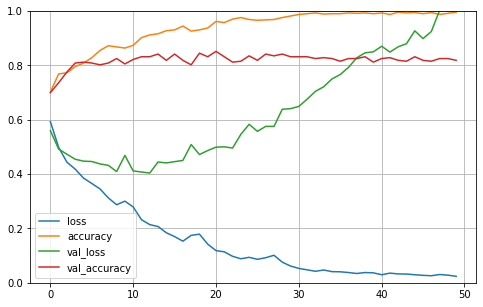

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# **6. Hyperparameter Tuning**

## **Apply a custom learning rate change using LearningRateScheduler**

Write a function that performs the exponential learning rate decay as indicated by the following formula: 𝑙𝑟=𝑙𝑟₀ × 𝑒^(−𝑘𝑡)

In [ ]:
from keras.callbacks import LearningRateScheduler
from keras.callbacks import History

In [ ]:
def DNN_Binary_Classification_KS(epochs,learning_rate,_input_dim,decay_rate,momentum):
    
    # Layer 1
    model = Sequential()
    model.add(Dense(10,input_shape=(_input_dim,)))
    model.add(Activation('relu'))
    
    # Layer 2
    model.add(Dense(10))
    model.add(Activation('relu'))
    
    # Layer 3
    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    # define the optimizer function
    sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)

    print(model.summary)
    
    # Model compilation
    model.compile(loss='binary_crossentropy',optimizer=sgd,metrics="accuracy")

    return model

In [ ]:
# solution
epochs = 10
learning_rate = 0.1 # initial learning rate
decay_rate = 0.05
momentum = 0.8
batch_size = 32
_input_dim = 61
# metrics = ["accruacy"]
valid_set = (X_test, y_test)

In [ ]:
%%time
bin_class_model = DNN_Binary_Classification_KS(epochs,learning_rate,_input_dim,
                                               decay_rate,momentum)

# fit the model
exponential_decay_model_history = bin_class_model.fit(X_train,y_train,
                                                      validation_data = valid_set,
                                                      batch_size=batch_size,
                                                      epochs=epochs)

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7f1b7e1c0310>>
Epoch 1/10
22/22 [==============================] - 1s 18ms/step - loss: 0.6535 - accuracy: 0.6107 - val_loss: 0.5885 - val_accuracy: 0.7063
Epoch 2/10
22/22 [==============================] - 0s 3ms/step - loss: 0.5898 - accuracy: 0.7038 - val_loss: 0.5732 - val_accuracy: 0.7063
Epoch 3/10
22/22 [==============================] - 0s 3ms/step - loss: 0.5613 - accuracy: 0.7060 - val_loss: 0.5599 - val_accuracy: 0.7063
Epoch 4/10
22/22 [==============================] - 0s 2ms/step - loss: 0.5746 - accuracy: 0.6852 - val_loss: 0.5525 - val_accuracy: 0.7063
Epoch 5/10
22/22 [==============================] - 0s 2ms/step - loss: 0.5381 - accuracy: 0.6889 - val_loss: 0.5405 - val_accuracy: 0.7063
Epoch 6/10
22/22 [==============================] - 0s 3ms/step - loss: 0.5104 - accuracy: 0.7313 - val_loss: 0.5343 - val_accuracy: 0.7063
Epoch 7/10
22/22 [==============================] - 0s 3ms/step -

## **Predictions**

In [ ]:
y_train_pred = bin_class_model.predict_classes(X_train)
y_test_pred = bin_class_model.predict_classes(X_test)

In [ ]:
# training accuracy
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.73      0.98      0.84       498
           1       0.74      0.14      0.23       206

    accuracy                           0.73       704
   macro avg       0.73      0.56      0.53       704
weighted avg       0.73      0.73      0.66       704



In [ ]:
# test accuracy
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.73      0.99      0.84       214
           1       0.80      0.13      0.23        89

    accuracy                           0.74       303
   macro avg       0.77      0.56      0.54       303
weighted avg       0.75      0.74      0.66       303



In [ ]:
pd.DataFrame(exponential_decay_model_history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.620929,0.673295,0.588473,0.706271
1,0.578811,0.707386,0.573177,0.706271
2,0.560780,0.707386,0.559909,0.706271
3,0.547194,0.707386,0.552544,0.706271
4,0.535283,0.707386,0.540487,0.706271
5,0.525478,0.707386,0.534313,0.706271
6,0.519272,0.707386,0.529037,0.706271
7,0.511020,0.711648,0.525358,0.719472
8,0.505567,0.720170,0.522052,0.735974
9,0.501029,0.724432,0.519404,0.735974


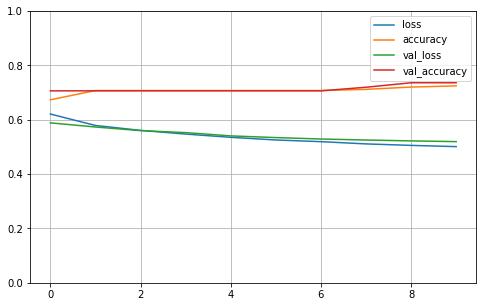

In [ ]:
pd.DataFrame(exponential_decay_model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [ ]:
from keras.callbacks import LearningRateScheduler
from keras.callbacks import History

# define the learning rate change 
def exp_decay(epoch):
    lrate = learning_rate * np.exp(-decay_rate*epoch)
    return lrate
    
# learning schedule callback
loss_history = History()
lr_rate = LearningRateScheduler(exp_decay)
callbacks_list = [loss_history, lr_rate]

In [ ]:
# you invoke the LearningRateScheduler during the .fit() phase
exponential_decay_model_history = exponential_decay_model.fit(X_train, y_train,
                                    batch_size=batch_size,
                                    epochs=epochs,
                                    callbacks=callbacks_list,
                                    verbose=1,
                                    validation_data=(x_test, y_test))